# Методы машинного обучения для обнаружения атак в сетях интернета вещей

## Импорт библиотек

In [ ]:
!pip install datret

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from datret.datret import DatRetClassifier
#from tabpfn import TabPFNClassifier
#from pytorch_tabnet.tab_model import TabNetClassifier

import tensorflow as tf
from tensorflow import keras
# from keras_tuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Работа с данными

### Чтение

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Маг. 1 семестр/Введение в искусственные нейронные сети/main_final.csv')
data = pd.read_csv('/content/drive/MyDrive/IoT-dataset/main_final.csv')

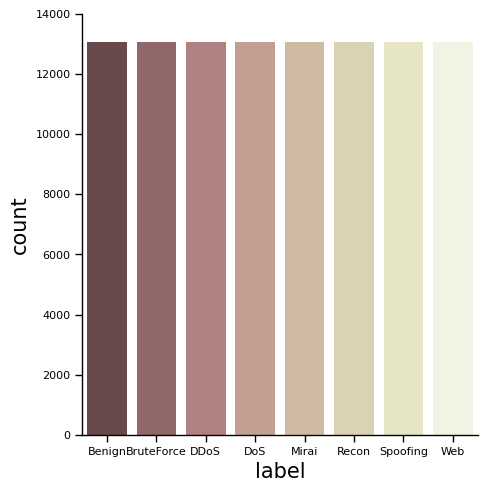

In [ ]:
sns.set_context("paper", rc={"axes.labelsize":15})
pl=sns.catplot(x="label", kind="count", palette="pink", data=data)
pl.set_xticklabels(fontsize=8)
pl.set_yticklabels(fontsize=8)
plt.show()

### Препроцессинг

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,104512.000000,1.045120e+05,104512.000000,104512.000000,1.045120e+05,1.045120e+05,1.045120e+05,104512.000000,104512.000000,104512.000000,...,104512.000000,104512.000000,104512.000000,1.045120e+05,104512.000000,104512.000000,104512.000000,1.045120e+05,104512.000000,104512.000000
mean,177.388674,4.351207e+05,11.741938,87.154934,4.388596e+03,4.388596e+03,6.797951e-08,0.015013,0.079618,0.029250,...,369.448717,203.035728,369.411125,8.324190e+07,9.493132,22.458603,286.876387,2.117082e+05,0.563144,141.372873
std,1871.752335,1.141162e+06,11.080860,39.373458,6.041084e+04,6.041084e+04,2.197663e-05,0.121603,0.270702,0.168508,...,519.358179,382.838694,523.111046,6.522641e+07,3.130387,14.871557,541.625591,8.493901e+05,0.436743,80.624405
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,8.106232e-07,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.035027,1.080000e+02,6.000000,64.000000,4.793558e+00,4.793558e+00,0.000000e+00,0.000000,0.000000,0.000000,...,57.768827,0.000000,57.600000,2.312167e-02,5.500000,10.741722,0.000000,0.000000e+00,0.000000,38.500000
50%,3.973427,1.090615e+04,7.100000,65.730000,3.006670e+01,3.006670e+01,0.000000e+00,0.000000,0.000000,0.000000,...,123.706552,39.130127,119.900000,8.314939e+07,9.500000,15.602168,55.142315,2.524423e+03,0.800000,141.550000
75%,48.021542,1.435160e+05,13.700000,99.400000,1.158891e+02,1.158891e+02,0.000000e+00,0.000000,0.000000,0.000000,...,554.000000,183.729738,554.000000,1.665180e+08,13.500000,33.286634,258.970591,5.195957e+04,1.000000,244.600000
max,99685.656389,9.815902e+06,47.000000,255.000000,4.194304e+06,4.194304e+06,7.104675e-03,1.000000,1.000000,1.000000,...,7549.361270,7814.299238,8409.200000,1.676394e+08,15.000000,117.256329,11051.087962,6.900415e+07,1.000000,244.600000


In [ ]:
data.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
# Эти столбцы после нормировки становятся полностью NaN, это значит, что в них все значения равны, они не имеют смысла для классификации
data.drop(['Telnet', 'SMTP', 'IRC', 'DHCP'], axis=1, inplace=True)

In [ ]:
# Подготовим уменьшенную версию датасета для ресурсоемких моделей

max_items_per_label = 300

data_small = data.groupby('label').apply(lambda x: x.sample(min(len(x), max_items_per_label)))

data_small = data_small.reset_index(drop=True)

In [ ]:
data.shape

(104512, 43)

In [ ]:
data_small.shape

(2400, 43)

In [ ]:
def split_to_train_valid_subsets(data):
  # Выделение целевой переменной
  target_col = data['label']
  data.drop(['label'], axis=1, inplace=True)

  # Нормализация
  data = (data-data.min()) / (data.max()-data.min())

  target_col.replace('Benign', 0, inplace=True)
  target_col.replace('DDoS', 1, inplace=True)
  target_col.replace('DoS', 2, inplace=True)
  target_col.replace('Mirai', 3, inplace=True)
  target_col.replace('Spoofing', 4, inplace=True)
  target_col.replace('Recon', 5, inplace=True)
  target_col.replace('Web', 6, inplace=True)
  target_col.replace('BruteForce', 7, inplace=True)
  # data = data.astype('float32')
  # target_col = target_col.astype('int32')

  # Разделение на выборки
  X_train, X_rem, y_train, y_rem = train_test_split(data, target_col, train_size=0.8, random_state=42)
  X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

  return X_train, X_rem, y_train, y_rem, X_valid, X_test, y_valid, y_test

In [ ]:
X_train, X_rem, y_train, y_rem, X_valid, X_test, y_valid, y_test = split_to_train_valid_subsets(data)
X_small_train, X_small_rem, y_small_train, y_small_rem, X_small_valid, X_small_test, y_small_valid, y_small_test = split_to_train_valid_subsets(data_small)

In [ ]:
# Функция вывода матрицы ошибок
def plot_confusion_matrix(cm):
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(5, 5))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Benign', 'DDoS', 'DoS', 'Mirai', 'Spoofing', 'Recon', 'Web', 'BruteForce'],
                yticklabels=['Benign', 'DDoS', 'DoS', 'Mirai', 'Spoofing', 'Recon', 'Web', 'BruteForce'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

## Методы ML

### Decision Tree

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 50, 5)]
max_depth.append(None)
tree_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [int(x) for x in np.linspace(2, 50, 5)],
    'max_depth': max_depth,
    'random_state': [42]
}

tree_base = DecisionTreeClassifier()
tree_gr = GridSearchCV(estimator=tree_base, param_grid=tree_grid, cv=2, verbose=1)
tree_gr.fit(X_train, y_train)
tree_gr.best_params_

Fitting 2 folds for each of 90 candidates, totalling 180 fits


{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 38,
 'random_state': 42}

In [ ]:
tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, min_samples_split=38)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=38,
                       random_state=42)

Accuracy:  0.8930348258706468
F1:  0.8921052462548877


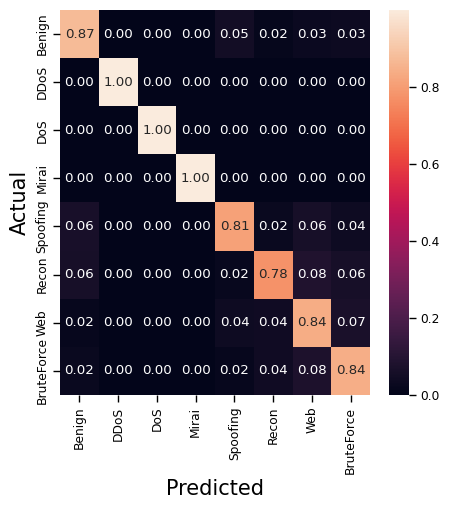

In [ ]:
y_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test,y_pred)
tree_f1 = f1_score(y_test,y_pred, average='macro')
print('Accuracy: ', tree_acc)
print('F1: ', tree_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### Random Forest

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 50, 5)]
max_depth.append(None)
rf_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
    'max_depth': max_depth,
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

rf_base = RandomForestClassifier()
rf_gr = GridSearchCV(estimator = rf_base, param_grid = rf_grid, cv = 2, verbose = 2)
rf_gr.fit(X_train, y_train)
rf_gr.best_params_

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100, random_state=42; total time=   9.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100, random_state=42; total time=   6.6s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200, random_state=42; total time=  14.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200, random_state=42; total time=  14.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, random_state=42; total time=  22.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, random_state=42; total time=  21.9s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100, random_state=42; total time=   6.9s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100, random_state=42; total time=   7.1s
[CV] END criterion=gini, max_depth=10, ma

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 42}

In [ ]:
rf = RandomForestClassifier(random_state=42, criterion='gini',
                            max_depth=40, max_features='sqrt', n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=300, random_state=42)

Accuracy:  0.9063337160352086
F1:  0.9056365411021041


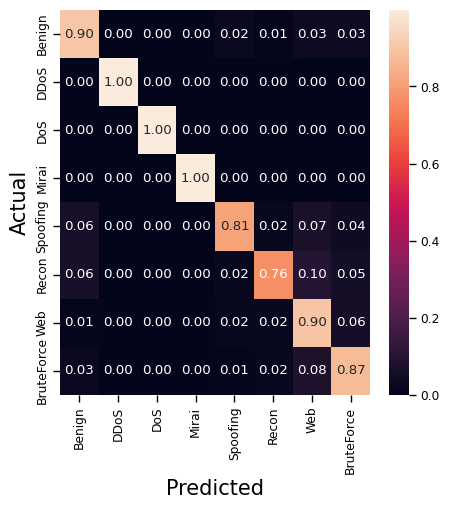

In [ ]:
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred)
rf_f1 = f1_score(y_test,y_pred, average='macro')
print('Accuracy: ', rf_acc)
print('F1: ', rf_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### kNN

In [ ]:
knn_grid = {
    'n_neighbors': [int(x) for x in np.linspace(2, 7, 1)],
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 50],
    'metric': ['cosine', 'euclidean']
}

knn_base = KNeighborsClassifier()
knn_gr = GridSearchCV(estimator = knn_base, param_grid = knn_grid, cv = 2, verbose = 2)
knn_gr.fit(X_train, y_train)
knn_gr.best_params_

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END leaf_size=20, metric=cosine, n_neighbors=2, weights=uniform; total time= 1.1min
[CV] END leaf_size=20, metric=cosine, n_neighbors=2, weights=uniform; total time=  34.7s
[CV] END leaf_size=20, metric=cosine, n_neighbors=2, weights=distance; total time=  33.1s
[CV] END leaf_size=20, metric=cosine, n_neighbors=2, weights=distance; total time=  32.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=2, weights=uniform; total time=  13.7s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=2, weights=uniform; total time=  17.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=2, weights=distance; total time=  13.4s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=2, weights=distance; total time=  12.7s
[CV] END leaf_size=30, metric=cosine, n_neighbors=2, weights=uniform; total time=  34.6s
[CV] END leaf_size=30, metric=cosine, n_neighbors=2, weights=uniform; total time=  35.2s
[CV] END leaf_size=30, metric=cos

{'leaf_size': 20,
 'metric': 'euclidean',
 'n_neighbors': 2,
 'weights': 'distance'}

Accuracy:  0.7106773823191733
F1:  0.7090382881393984


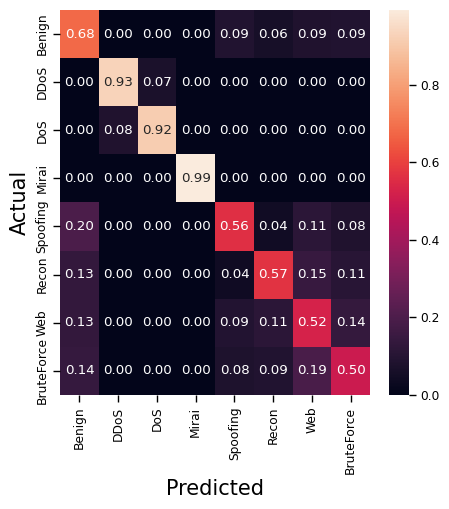

In [ ]:
knn = KNeighborsClassifier(leaf_size=40, metric='euclidean', n_neighbors=4)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred)
knn_f1 = f1_score(y_test,y_pred, average='macro')
print('Accuracy: ', knn_acc)
print('F1: ', knn_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### Logistic Regression

In [ ]:
lr_grid = {
    'C': [1., 1e2, 1e4, 1e5],
    'max_iter': [100, 200, 300, 400],
    'multi_class': ['ovr', 'multinomial']
}

lr_base = LogisticRegression()
lr_gr = GridSearchCV(estimator = lr_base, param_grid = lr_grid, cv = 2, verbose = 1)
lr_gr.fit(X_train, y_train)
lr_gr.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 10000.0, 'max_iter': 300, 'multi_class': 'ovr'}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.6444699579027937
F1:  0.643710939792329


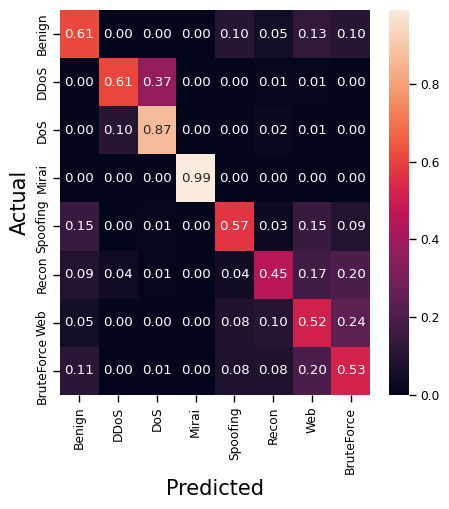

In [ ]:
lr = LogisticRegression(C=10000.0, max_iter=300, multi_class= 'ovr')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,y_pred)
lr_f1 = f1_score(y_test,y_pred, average='macro')
print('Accuracy: ', lr_acc)
print('F1: ', lr_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:24:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy:  0.9120742441637965
F1:  0.9112718337478948


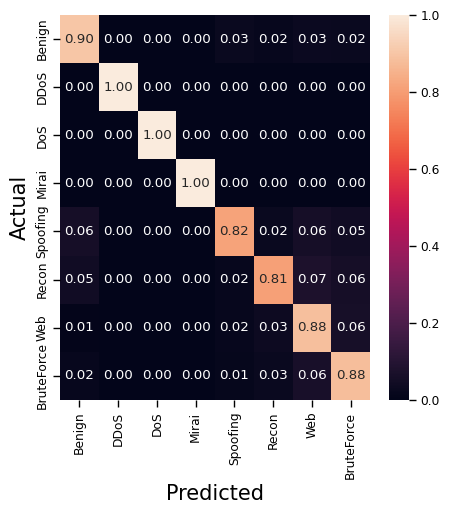

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {
   'max_depth': 20,
   'eta': 0.3,
   'silent': 1,
   'objective': 'multi:softprob',
   'num_class': 8}
num_round = 20

bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
y_pred = np.asarray([np.argmax(line) for line in preds])

xgb_acc = accuracy_score(y_test,y_pred)
xgb_f1 = f1_score(y_test,y_pred, average='macro')
print('Accuracy: ', xgb_acc)
print('F1: ', xgb_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

## Методы DL

### DatRet

Epoch 1/50
8360/8360 [==============================] - 47s 5ms/step - loss: 0.9134 - lr: 0.0010
Epoch 2/50
8360/8360 [==============================] - 39s 5ms/step - loss: 0.8051 - lr: 0.0010
Epoch 3/50
8360/8360 [==============================] - 40s 5ms/step - loss: 0.7770 - lr: 0.0010
Epoch 4/50
8360/8360 [==============================] - 38s 5ms/step - loss: 0.7542 - lr: 0.0010
Epoch 5/50
8360/8360 [==============================] - 36s 4ms/step - loss: 0.7414 - lr: 0.0010
Epoch 6/50
8360/8360 [==============================] - 38s 4ms/step - loss: 0.7268 - lr: 0.0010
Epoch 7/50
8360/8360 [==============================] - 38s 5ms/step - loss: 0.7152 - lr: 0.0010
Epoch 8/50
8360/8360 [==============================] - 39s 5ms/step - loss: 0.7096 - lr: 0.0010
Epoch 9/50
8360/8360 [==============================] - 37s 4ms/step - loss: 0.7025 - lr: 0.0010
Epoch 10/50
8360/8360 [==============================] - 38s 5ms/step - loss: 0.6928 - lr: 0.0010
Epoch 11/50
8360/8360 [======

327/327 [==============================] - 1s 2ms/step
Accuracy:  0.7528702640642939
F1:  0.7526219090166751


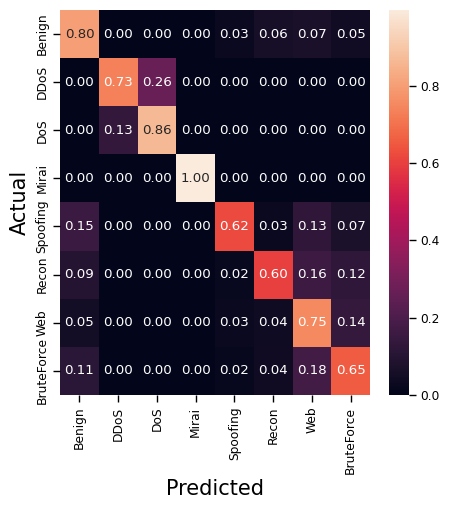

In [ ]:
dr = DatRetClassifier()
dr.fit(X_train, y_train)

y_pred = dr.predict(X_test)
dr_acc = accuracy_score(y_test, y_pred)
dr_f1 = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', dr_acc)
print('F1: ', dr_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### CNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Convolution1D(filters=128, kernel_size=3, activation='relu', input_shape=(42,1))) # 64
model.add(keras.layers.Convolution1D(filters=64, kernel_size=3, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) # 100
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mae', 'accuracy'])

history = model.fit(X_train, y_train, epochs=50, #40
                  validation_data = (X_valid, y_valid), verbose=1)

Epoch 1/50
2613/2613 [==============================] - 51s 12ms/step - loss: 0.9365 - mae: 3.4135 - accuracy: 0.6012 - val_loss: 0.8029 - val_mae: 3.3687 - val_accuracy: 0.6546
Epoch 2/50
2613/2613 [==============================] - 22s 8ms/step - loss: 0.8056 - mae: 3.4135 - accuracy: 0.6533 - val_loss: 0.7613 - val_mae: 3.3687 - val_accuracy: 0.6742
Epoch 3/50
2613/2613 [==============================] - 14s 5ms/step - loss: 0.7763 - mae: 3.4135 - accuracy: 0.6665 - val_loss: 0.7456 - val_mae: 3.3687 - val_accuracy: 0.6851
Epoch 4/50
2613/2613 [==============================] - 16s 6ms/step - loss: 0.7571 - mae: 3.4135 - accuracy: 0.6741 - val_loss: 0.7270 - val_mae: 3.3687 - val_accuracy: 0.6901
Epoch 5/50
2613/2613 [==============================] - 13s 5ms/step - loss: 0.7417 - mae: 3.4135 - accuracy: 0.6823 - val_loss: 0.7042 - val_mae: 3.3687 - val_accuracy: 0.6935
Epoch 6/50
2613/2613 [==============================] - 13s 5ms/step - loss: 0.7273 - mae: 3.4135 - accuracy: 0.68

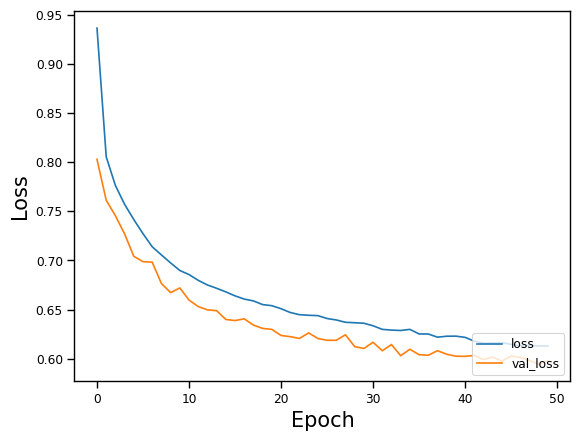

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

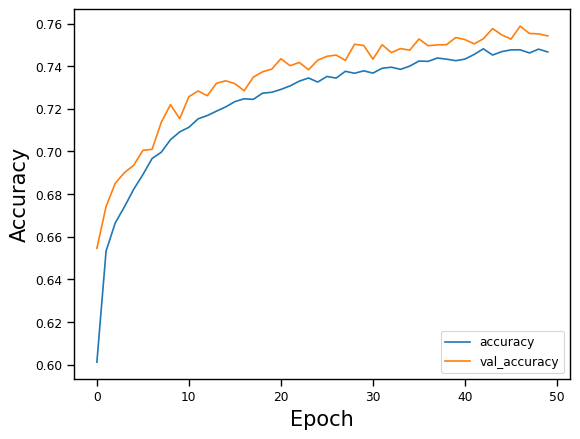

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

327/327 [==============================] - 1s 2ms/step
Accuracy:  0.7564102564102564
F1:  0.7563105538457491


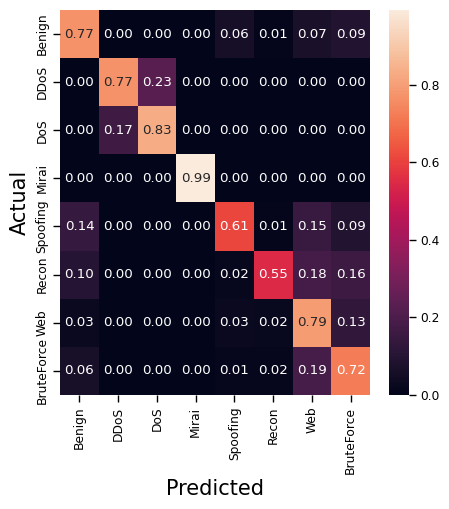

In [ ]:
y_pred2 = model.predict(X_test)
# y_pred2 = np.rint(y_pred2)
y_pred = []
for i in range(len(y_pred2)):
  ind = np.where(y_pred2[i] == max(y_pred2[i]))[0].tolist()[0]
  y_pred.append(ind)

cnn_acc = accuracy_score(y_test,y_pred)
cnn_f1 = f1_score(y_test,y_pred, average='macro')
print('Accuracy: ', cnn_acc)
print('F1: ', cnn_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### LSTM

In [ ]:
def reshape_df(df):
  df_np = np.array(df)
  df_np = np.expand_dims(df_np, axis=1)
  return df_np

In [ ]:
X_train_lstm = reshape_df(X_train)
X_test_lstm = reshape_df(X_test)
X_valid_lstm = reshape_df(X_valid)
X_train_lstm.shape

(83609, 1, 42)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(None, 42)))
model.add(keras.layers.LSTM(256, activation='relu', return_sequences=True)) # 512, 256
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True)) # 256, 128
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True)) # 256
#model.add(SeqSelfAttention(attention_activation='sigmoid', units=128))
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=False)) # 128
model.add(keras.layers.Dense(100, activation='relu')) # 100
model.add(keras.layers.Dense(80, activation='relu')) # 80
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mae', 'accuracy'])

In [ ]:
history = model.fit(X_train_lstm, y_train, epochs=30, #30
                  validation_data = (X_valid_lstm, y_valid), verbose=1)

Epoch 1/30
2613/2613 [==============================] - 84s 25ms/step - loss: 1.0301 - mae: 3.4135 - accuracy: 0.5475 - val_loss: 0.8475 - val_mae: 3.3687 - val_accuracy: 0.6297
Epoch 2/30
2613/2613 [==============================] - 71s 27ms/step - loss: 0.8374 - mae: 3.4135 - accuracy: 0.6372 - val_loss: 0.7868 - val_mae: 3.3687 - val_accuracy: 0.6601
Epoch 3/30
2613/2613 [==============================] - 57s 22ms/step - loss: 0.8038 - mae: 3.4135 - accuracy: 0.6540 - val_loss: 0.7602 - val_mae: 3.3687 - val_accuracy: 0.6701
Epoch 4/30
2613/2613 [==============================] - 62s 24ms/step - loss: 0.7794 - mae: 3.4135 - accuracy: 0.6627 - val_loss: 0.7528 - val_mae: 3.3687 - val_accuracy: 0.6749
Epoch 5/30
2613/2613 [==============================] - 58s 22ms/step - loss: 0.7638 - mae: 3.4135 - accuracy: 0.6703 - val_loss: 0.7446 - val_mae: 3.3687 - val_accuracy: 0.6774
Epoch 6/30
2613/2613 [==============================] - 66s 25ms/step - loss: 0.7500 - mae: 3.4135 - accuracy:

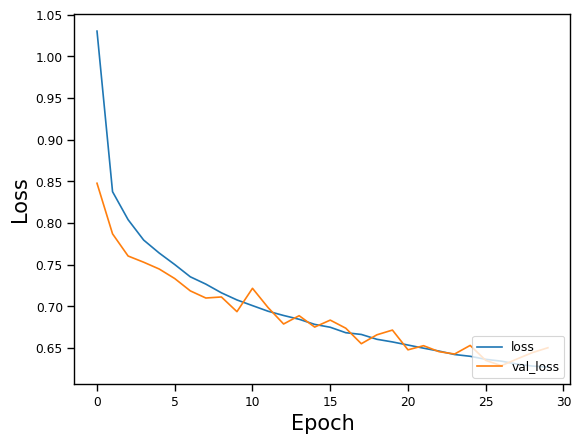

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

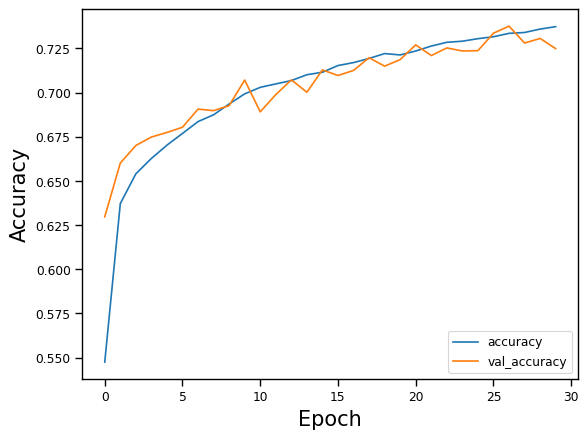

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

327/327 [==============================] - 1s 3ms/step
Accuracy:  0.7323000382701875
F1:  0.7344183569024538


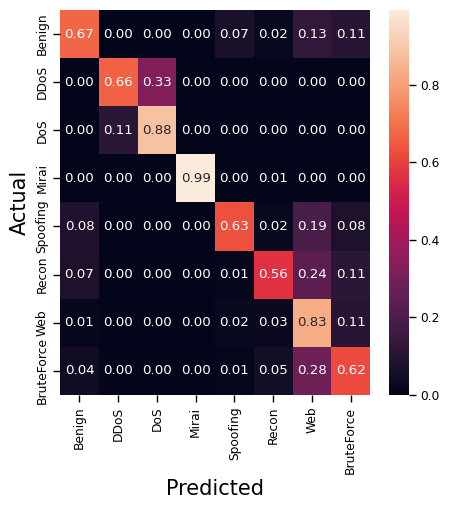

In [ ]:
y_pred = model.predict(X_test_lstm)

for i in range(len(y_pred)):
  y_pred[i] = np.argmax(y_pred[i])

y_pred2 = []
for p in y_pred:
  y_pred2.append(int(p[0]))

lstm_acc = accuracy_score(y_test, y_pred2)
lstm_f1 = f1_score(y_test, y_pred2, average='macro')
print('Accuracy: ', lstm_acc)
print('F1: ', lstm_f1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred2))

### TabNet

In [ ]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 385.6 kB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

tabnet = TabNetClassifier()
tabnet.fit(
  X_train.values, y_train,
  eval_set=[(X_valid.values, y_valid)]
)
preds = tabnet.predict(X_test.values)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.3909  | val_0_accuracy: 0.30236 |  0:00:10s
epoch 1  | loss: 0.96412 | val_0_accuracy: 0.44369 |  0:00:17s
epoch 2  | loss: 0.91096 | val_0_accuracy: 0.50215 |  0:00:22s
epoch 3  | loss: 0.87758 | val_0_accuracy: 0.51297 |  0:00:25s
epoch 4  | loss: 0.86895 | val_0_accuracy: 0.55755 |  0:00:30s
epoch 5  | loss: 0.86157 | val_0_accuracy: 0.60731 |  0:00:34s
epoch 6  | loss: 0.84365 | val_0_accuracy: 0.59803 |  0:00:37s
epoch 7  | loss: 0.84169 | val_0_accuracy: 0.61018 |  0:00:41s
epoch 8  | loss: 0.82506 | val_0_accuracy: 0.63305 |  0:00:45s
epoch 9  | loss: 0.8084  | val_0_accuracy: 0.64635 |  0:00:49s
epoch 10 | loss: 0.79664 | val_0_accuracy: 0.66903 |  0:00:53s
epoch 11 | loss: 0.7924  | val_0_accuracy: 0.65582 |  0:00:57s
epoch 12 | loss: 0.78334 | val_0_accuracy: 0.66692 |  0:01:02s
epoch 13 | loss: 0.77937 | val_0_accuracy: 0.67018 |  0:01:06s
epoch 14 | loss: 0.7674  | val_0_accuracy: 0.66951 |  0:01:09s
epoch 15 | loss: 0.76869 | val_0_accuracy: 0.67946 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy:  0.6978568694986605
F1:  0.6969615364889122


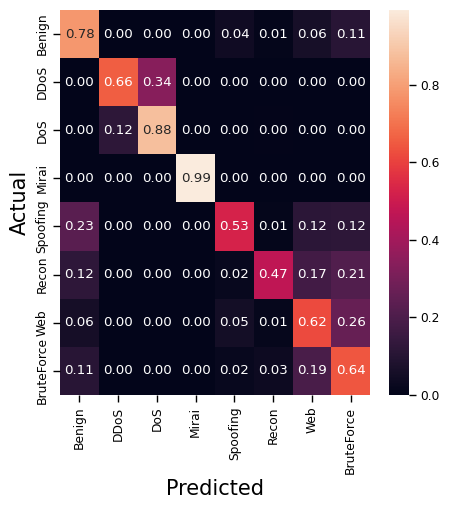

In [ ]:
tabnet_acc = accuracy_score(y_test,preds)
tabnet_f1 = f1_score(y_test,preds, average='macro')
print('Accuracy: ', tabnet_acc)
print('F1: ', tabnet_f1)
plot_confusion_matrix(confusion_matrix(y_test, preds))

### TabPFN

In [ ]:
# https://github.com/automl/TabPFN
!pip install tabpfn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
import tabpfn
tab = tabpfn.TabPFNClassifier(device='cpu', N_ensemble_configurations=256) # 32
tab.fit(X_small_train, y_small_train, overwrite_warning=True)

We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


TabPFNClassifier(N_ensemble_configurations=256)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

Accuracy:  0.7
F1:  0.7051611555087856


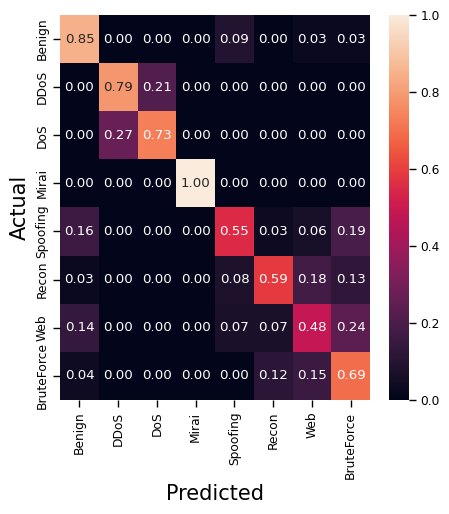

In [ ]:
y_pred = tab.predict(X_small_test)
tab_acc = accuracy_score(y_small_test,y_pred)
tab_f1 = f1_score(y_small_test,y_pred, average='macro')
print('Accuracy: ', tab_acc)
print('F1: ', tab_f1)
plot_confusion_matrix(confusion_matrix(y_small_test, y_pred))